In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
df = pd.concat([X, y], axis= 1)

df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Figure size 1200x1200 with 0 Axes>

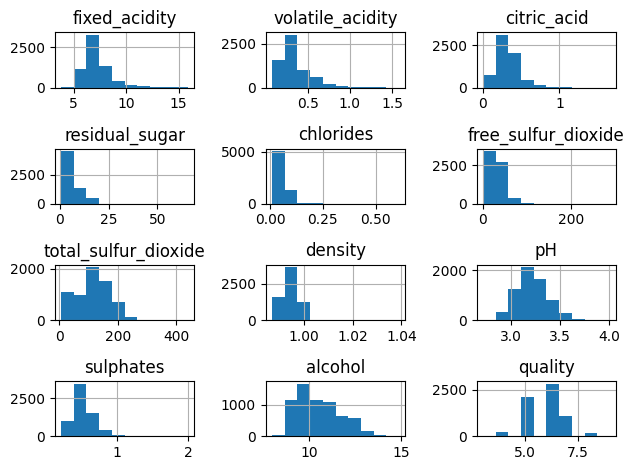

In [4]:
plt.figure(figsize= (12, 12))

df.hist()
plt.tight_layout()
plt.show()

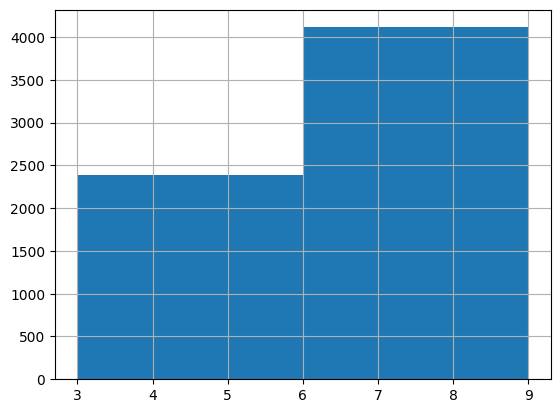

In [5]:
df['quality'].hist(bins = 2)

plt.show()

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
df['is_good'] = (df['quality'] >= 6).astype(int)

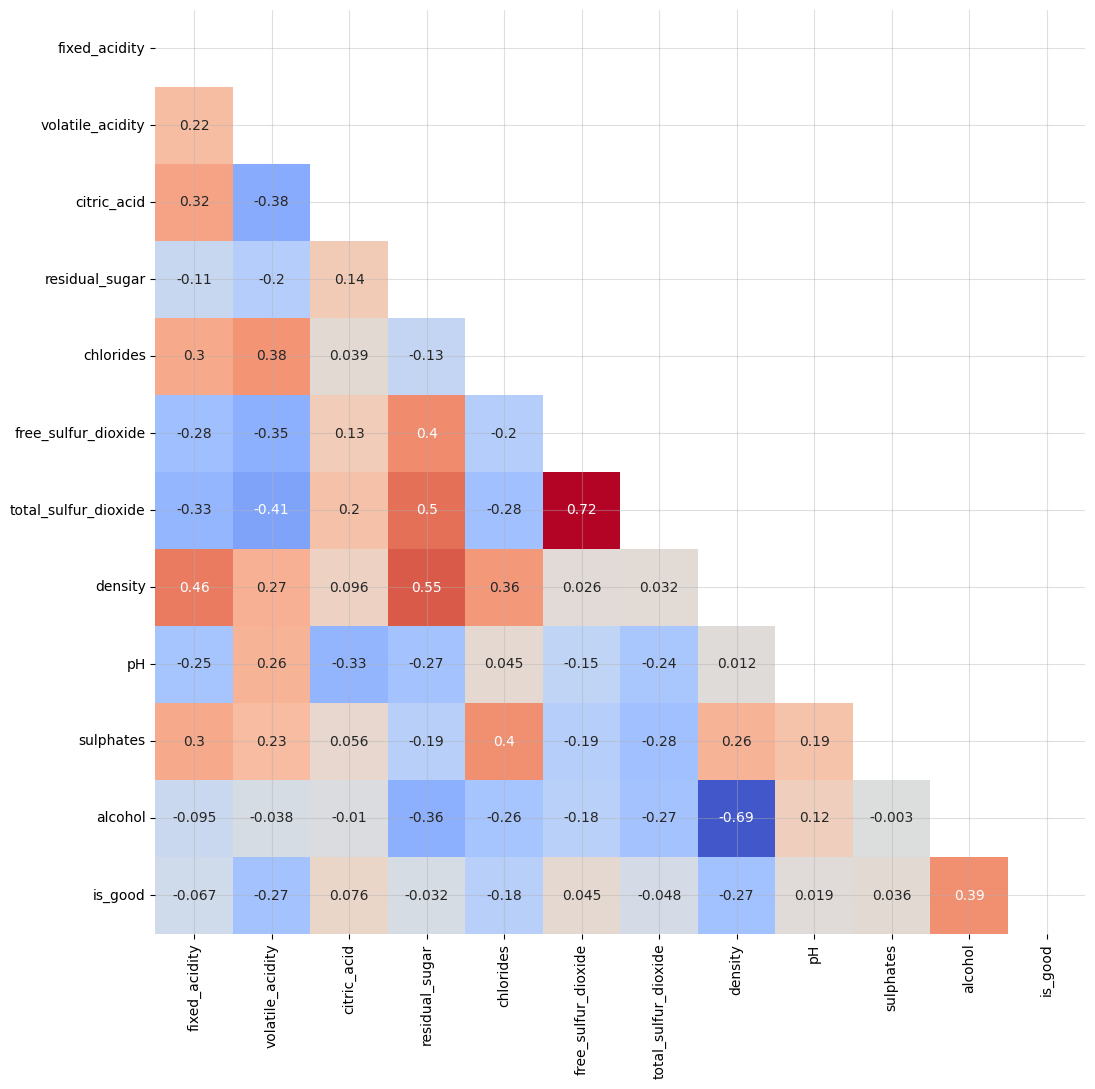

In [8]:
import seaborn as sns
features = [col for col in df.columns if col != 'quality']

corr_df = df[features]

matrix = corr_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

plt.figure(figsize= (12, 12))
sns.heatmap(matrix, mask = mask, center = 0, cbar = False,
            annot = True, cmap= 'coolwarm')
plt.grid(alpha = 0.4)
plt.show()



In [9]:
features_to_use = [
    'fixed_acidity', 'volatile_acidity',
    'chlorides', 'density', 'alcohol'
]


X = df[features_to_use].copy()
y = df['is_good'].copy()

from sklearn.model_selection import train_test_split

X_train, X_temp,  y_train, y_temp = train_test_split(X, y, test_size= 0.3, 
                                                    random_state=8, stratify= y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, 
                                                    random_state=8, stratify= y_temp)


neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)

ratio_pos = neg / pos



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


xgb_model = Pipeline([
    ('xgb', XGBClassifier(
    n_estimators= 1000,
    random_state = 8,
    scale_pos_weight = ratio_pos,
    #early_stopping_rounds = 50,
    eval_metric = 'logloss',

) )
])


xgb_model.fit(
    X_train, y_train,
    xgb__eval_set = [(X_val, y_val)],
    xgb__verbose = 100
)

[0]	validation_0-logloss:0.62016
[100]	validation_0-logloss:0.49996
[200]	validation_0-logloss:0.52213
[300]	validation_0-logloss:0.55949
[400]	validation_0-logloss:0.58895
[500]	validation_0-logloss:0.61719
[600]	validation_0-logloss:0.64687
[700]	validation_0-logloss:0.66968
[800]	validation_0-logloss:0.69254
[900]	validation_0-logloss:0.70774
[999]	validation_0-logloss:0.71944


,steps,"[('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [11]:
base = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

base.fit(X_train, y_train)



,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [12]:
from sklearn.metrics import confusion_matrix, classification_report


y_xgb = xgb_model.predict(X_test)
y_base = base.predict(X_test)


print("XGB model:\n", classification_report(y_test, y_xgb))
print("=================================================")


print("Base model:\n", classification_report(y_test, y_base))

XGB model:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70       358
           1       0.83      0.82      0.82       617

    accuracy                           0.78       975
   macro avg       0.76      0.76      0.76       975
weighted avg       0.78      0.78      0.78       975

Base model:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62       358
           1       0.77      0.86      0.81       617

    accuracy                           0.75       975
   macro avg       0.73      0.71      0.72       975
weighted avg       0.74      0.75      0.74       975



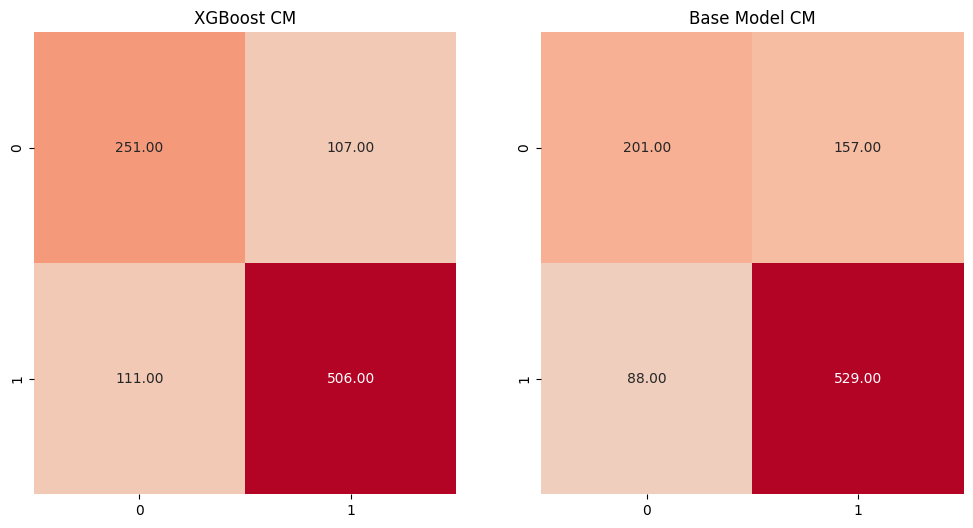

In [13]:
cm_xgb = confusion_matrix(y_test, y_xgb)
cm_base = confusion_matrix(y_test, y_base)

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_xgb, annot = True, fmt = '.2f', center = 0,
            cmap = 'coolwarm', cbar = False)
plt.title("XGBoost CM")

plt.subplot(1, 2, 2)
sns.heatmap(cm_base, annot = True, fmt = '.2f', center = 0,
            cmap = 'coolwarm', cbar = False)
plt.title("Base Model CM")
plt.show()


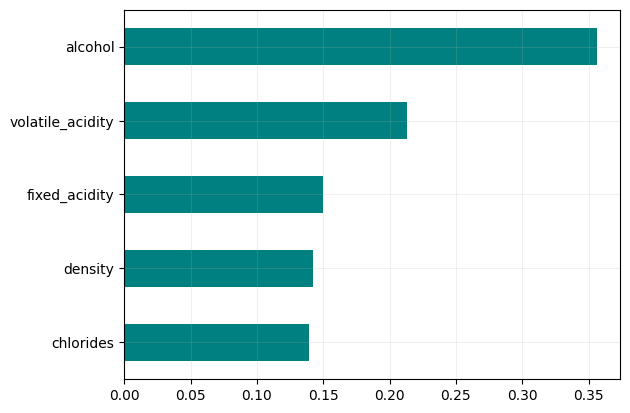

In [14]:



xgb_feat = xgb_model.named_steps['xgb']

feat_imp = pd.Series(xgb_feat.feature_importances_, index = features_to_use).sort_values()

feat_imp.plot(kind= 'barh', color= 'teal')
plt.grid(alpha = 0.2)
plt.show()

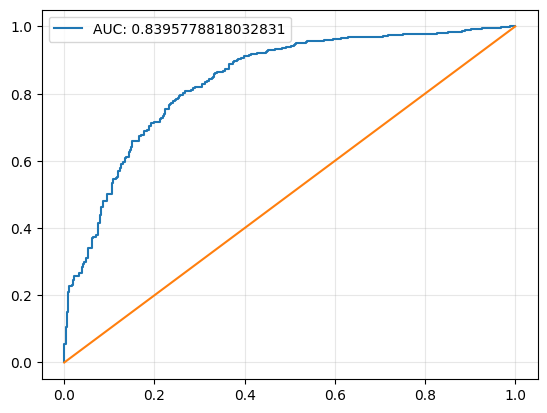

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

y_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= f"AUC: {auc}")
plt.plot([0, 1], [0, 1])

plt.legend()
plt.grid(alpha = 0.3)

plt.show()

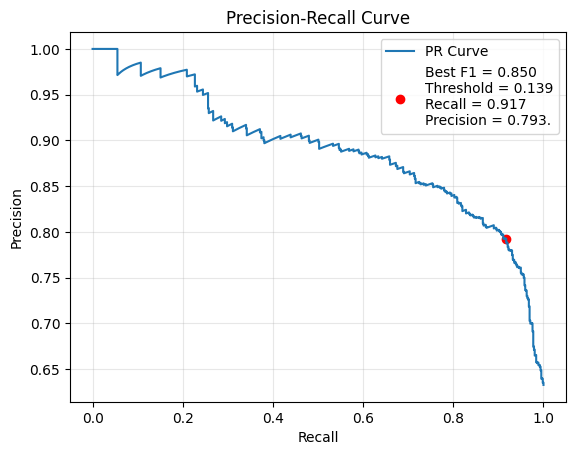

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_recall = recall[best_idx]
best_precision = precision[best_idx]


avg_prec = average_precision_score(y_test, y_prob)


plt.plot(recall, precision, label="PR Curve")

# Best point
plt.scatter(recall[best_idx], precision[best_idx], color = 'red',
                label=(f'Best F1 = {best_f1:.3f}\n'
                        f'Threshold = {best_threshold:.3f}\n'
                        f'Recall = {best_recall:.3f}\n'
                        f'Precision = {best_precision:.3f}.'),
            marker='o')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(alpha=0.3)

plt.show()